# Pricing an option

In [1]:
import numpy as np
import sympy as sy
from sympy.stats import Normal as syNormal, cdf
sy.init_printing()

In [2]:
# adapted from https://gist.github.com/raddy/bd0e977dc8437a4f8276
#spot, strike, vol, days till expiry, interest rate, call or put (1,-1)
S, K, vol, dte, r,cp = sy.symbols('S,K,vol,dte,r,cp')

T = dte / 260.
N = syNormal('N', 0.0, 1.0)

d1 = (sy.ln(S / K) + (0.5 * vol ** 2) * T) / (vol * sy.sqrt(T))
d2 = d1 - vol * sy.sqrt(T)

tv = sy.exp(-r * T) * (cp *S * cdf(N)(cp*d1) - cp * K  * cdf(N)(cp*d2))

#Black TV
bs_tv = sy.lambdify((S, K, vol, dte, r,cp),tv)

# #1st Order Greeks
# delta = sy.lambdify((S, K, vol, dte, r,cp),tv.diff(S))
# vega = sy.lambdify((S, K, vol, dte, r,cp),tv.diff(vol)/100.) #WATCH UNITS
# theta = sy.lambdify((S, K, vol, dte, r,cp),tv.diff(dte))
# rho = sy.lambdify((S, K, vol, dte, r,cp),tv.diff(r))

# #2nd Order Greeks
# gamma = sy.lambdify((S, K, vol, dte, r,cp),tv.diff(S,S))
# vanna = sy.lambdify((S, K, vol, dte, r,cp),tv.diff(S,vol)/100.)
# vomma = sy.lambdify((S, K, vol, dte, r,cp),tv.diff(vol,vol)/1e4) #IN TICKS
# charm = sy.lambdify((S, K, vol, dte, r,cp),tv.diff(S,dte)) #DELTA DECAY

# #3rd Order -- Who cares about anything about dGamma?
# speed = sy.lambdify((S, K, vol, dte, r,cp),tv.diff(S,3))

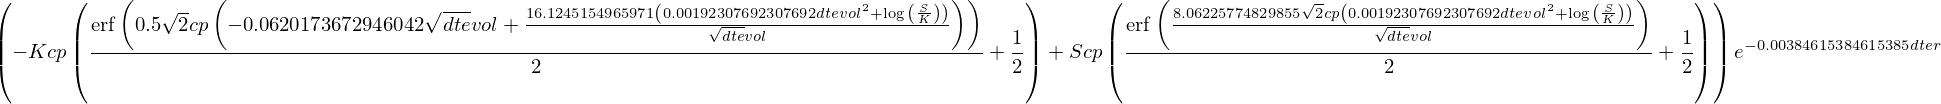

In [3]:
tv

In [4]:
import tributary.symbolic as ts
clazz = ts.construct_lazy(tv)

In [5]:
l = clazz(S=210.59, K=205, vol=14.04, dte=4, r=.2175, cp=-1)

['r', 'S', 'K', 'cp', 'vol', 'dte']


In [6]:
l.evaluate()()

In [7]:
l.K = 210
l.evaluate()()

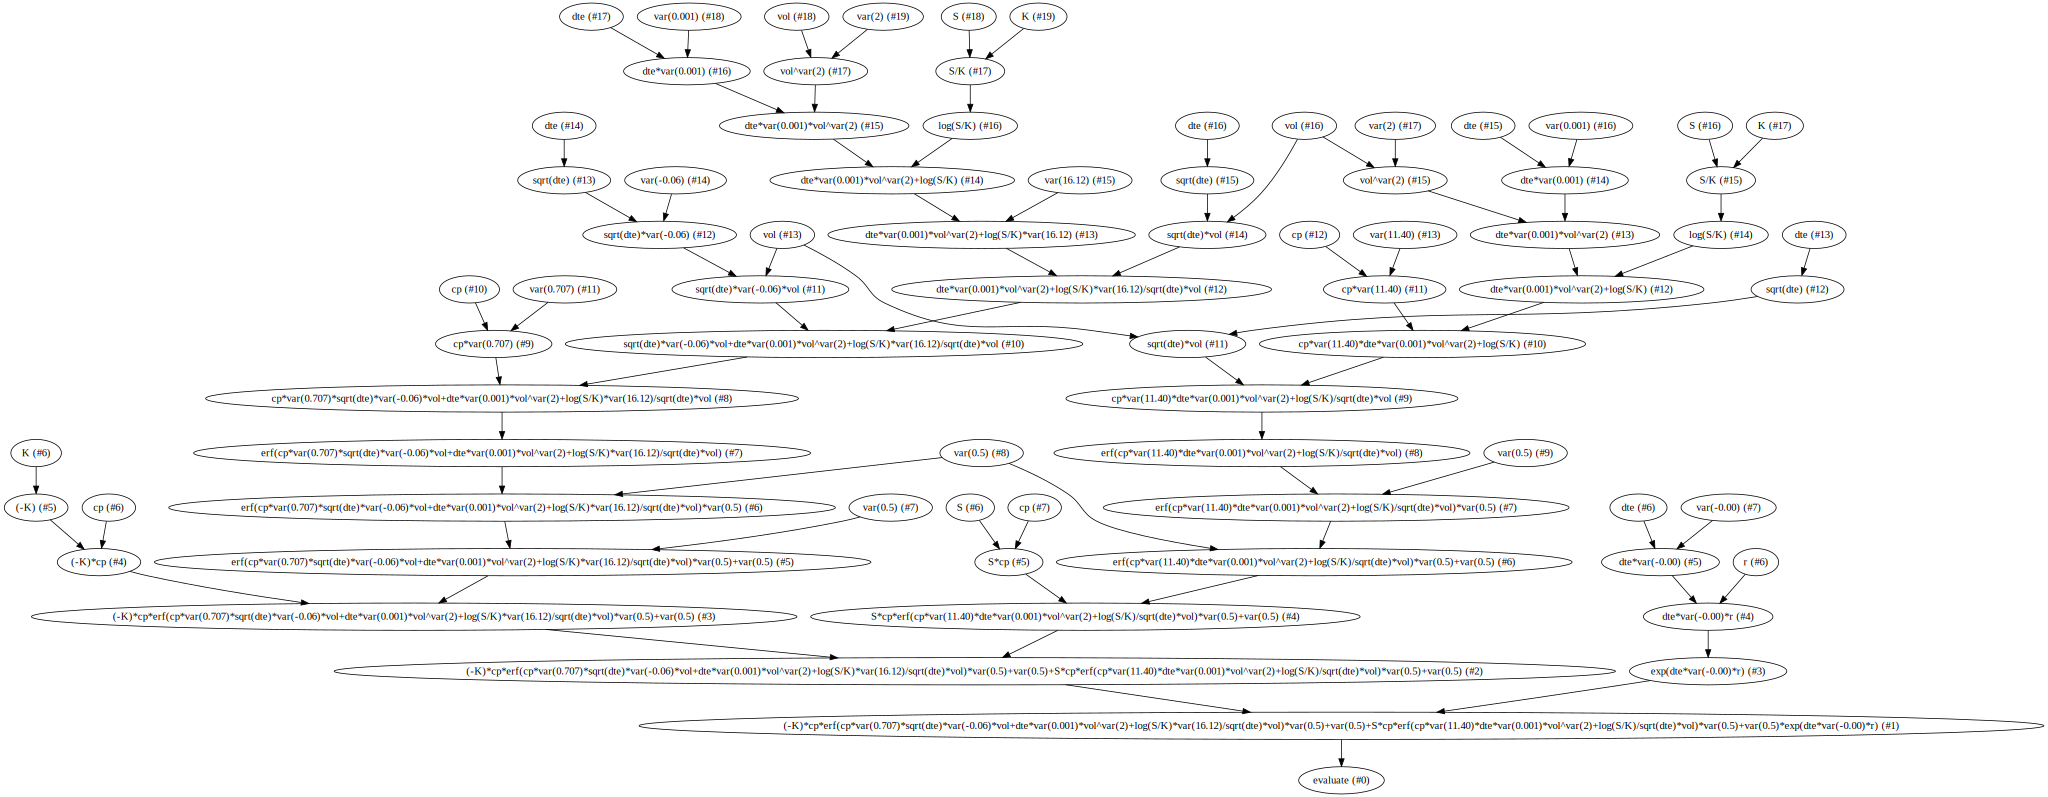

In [8]:
l.evaluate().graphviz()

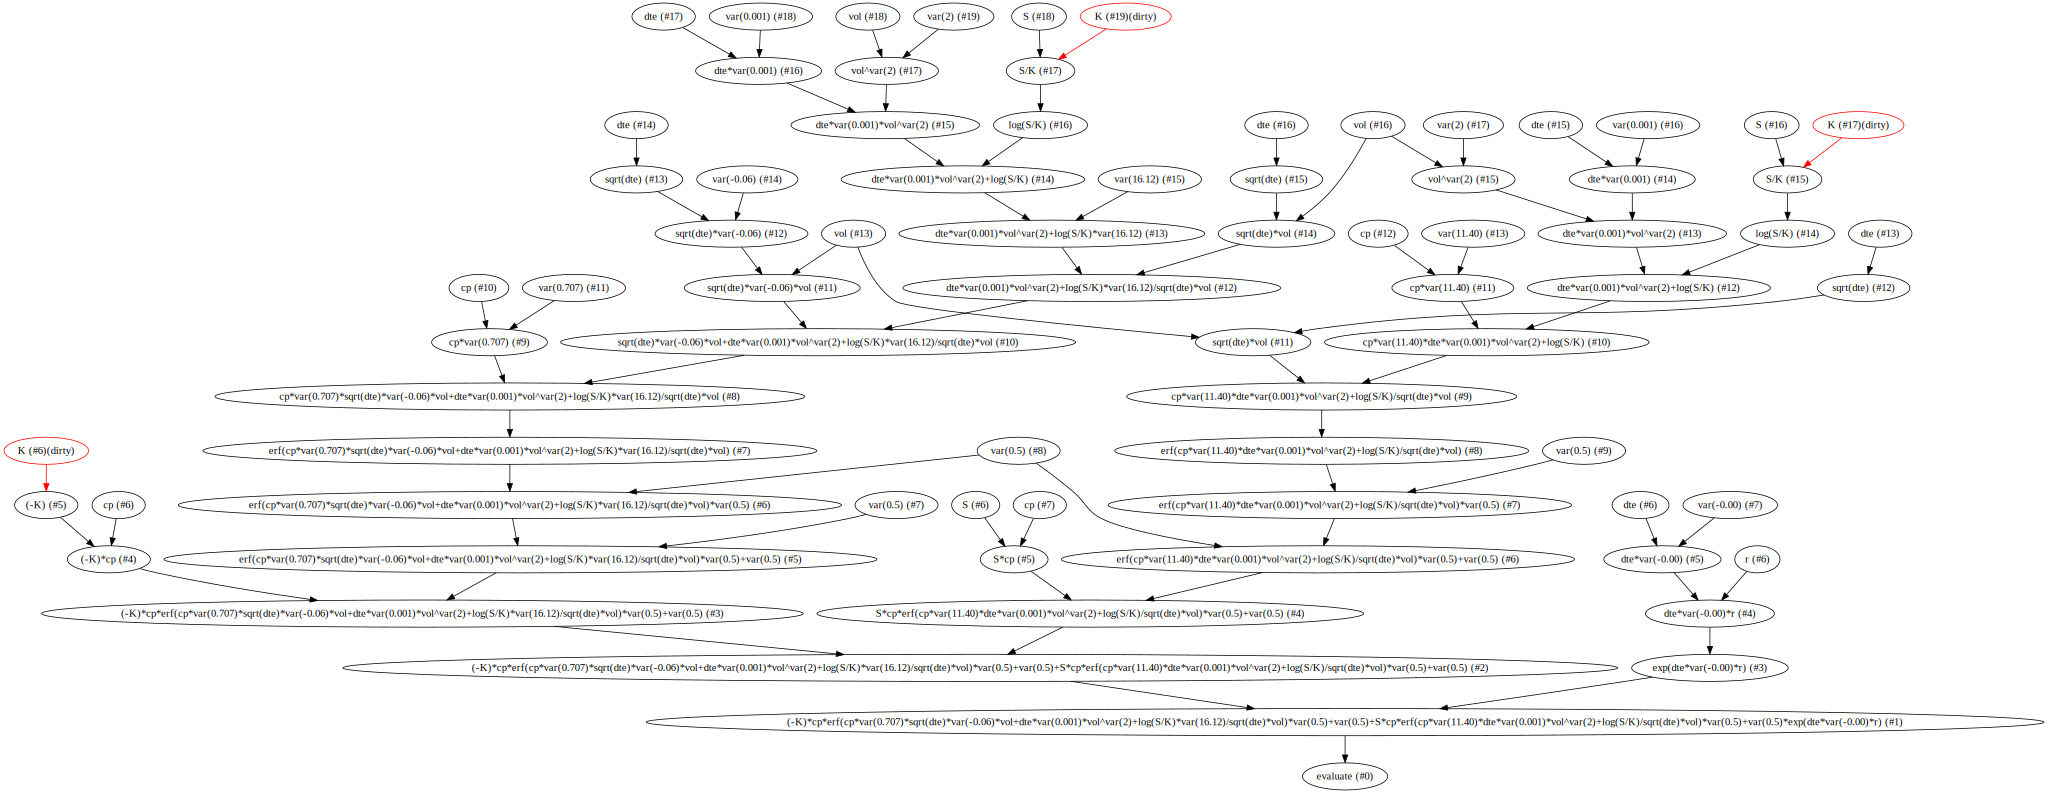

In [9]:
l.K = 205
l.evaluate().graphviz()